In [1]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.optimizers import Nadam
from PIL import Image
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, fbeta_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

In [2]:
img_array = cv2.imread('C:/Users/snehs/OneDrive/Desktop/train/happy/Training_10046809.jpg')

In [3]:
img_array.shape

(48, 48, 3)

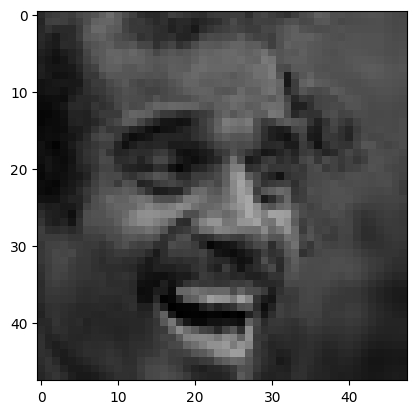

In [4]:
plt.imshow(img_array)

In [5]:
classes = ['angry','disgust','fear','happy','neutral','sad','surprise']

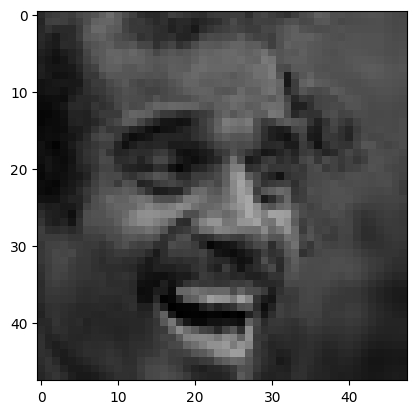

In [6]:
root_dir_train = 'C:/Users/snehs/OneDrive/Desktop/train/'
for category in classes:
    path = os.path.join(root_dir_train,category)
    for img in os.listdir(path):
        img_aray = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

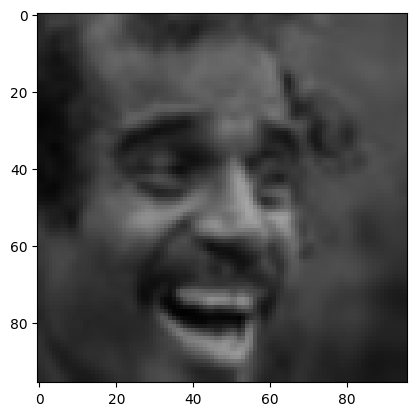

In [25]:
img_size = 96
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [26]:
new_array.shape

(96, 96, 3)

reading all the images and converting them into a array

In [27]:
X = [] ##data
Y = [] ##feature

def create_training_data():
    for category in classes:
        path = os.path.join(root_dir_train,category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_aray = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(img_size,img_size))
                new_array = new_array/255.0
                X.append(new_array)
                Y.append(class_num)
            except Exception as e:
                continue

In [28]:
create_training_data()

In [29]:
print(len(X),len(Y))

28709 28709


In [30]:
np.array(X).shape

(28709, 96, 96, 3)

In [31]:
X = np.array(X).reshape(-1,img_size,img_size,3)

In [38]:
base_model = keras.applications.MobileNetV2(include_top=False, input_shape=(96,96,3))
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(7, activation='softmax')  
])

9406464/9406464 [==============================] - 5s 1us/step


In [43]:
model.compile(optimizer=Nadam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
reduclr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_96 (Funct  (None, 3, 3, 1280)        2257984   
 ional)                                                          
                                                                 
 flatten_3 (Flatten)         (None, 11520)             0         
                                                                 
 dense_9 (Dense)             (None, 256)               2949376   
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 7)                 903       
                                                                 
Total params: 5241159 (19.99 MB)
Trainable params: 5207047 (19.86 MB)
Non-trainable params: 34112 (133.25 KB)
__________

In [45]:
Y = np.array(Y)

In [46]:
model.fit(X, Y, epochs=30, batch_size=32, validation_split=0.2, callbacks=[reduclr])

In [ ]:
model.save('emotion_detection.h5')